# Unsupervised Learning : Clustering, Preprocessing & Dimensionality reduction
### K. Verbeeck, T. Vermeulen, J. Maervoet
Data Science (Theory) -- OGI02i

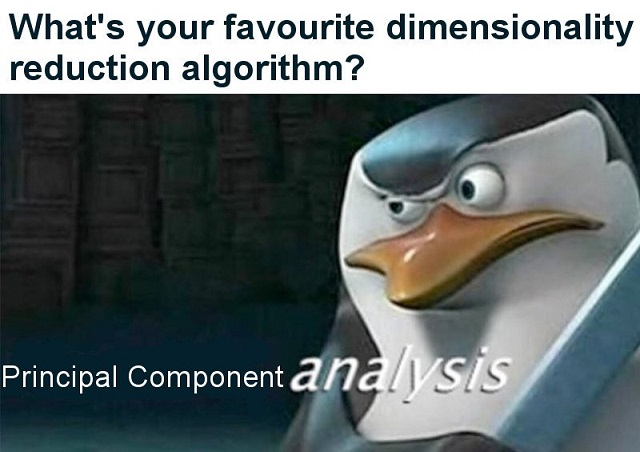

### Nuttige technieken voor :

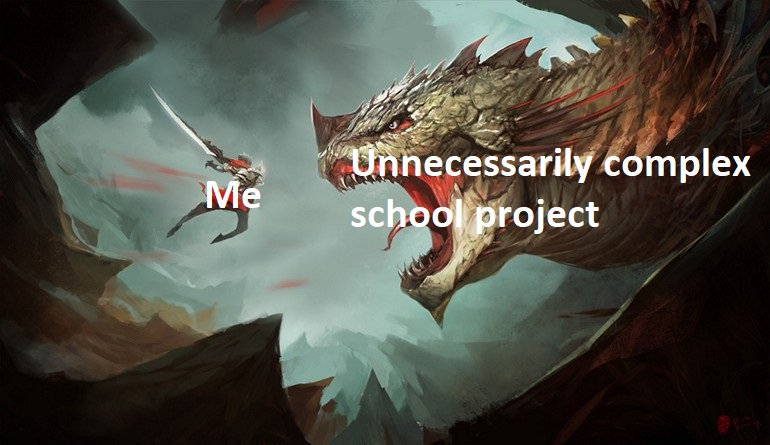

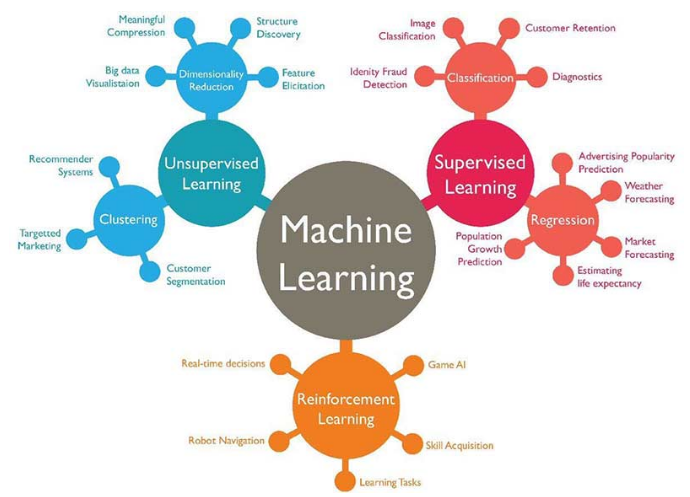

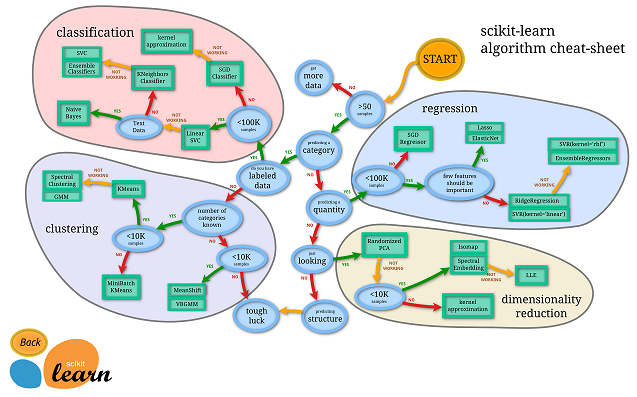

### Unsupervised learning

> De data die beschikbaar is voor **niet gesuperviseerd leren** bevat geen labels of target waarden. Alleen de inputdata is beschikbaar (features) zonder de overeenkomstige outputdata. De taak die nog mogelijk blijft is om kennis / structuur / patronen te herkennen / extraheren uit de beschikbare data. Dit kan onder volgende vormen :

 - **datatransformatie** :  om data beter te visualiseren of de dimensie ervan te verminderen (minder features bvb)
 - **dataclustering** : om data te gaan groeperen in sets van gelijkaardige cases / items

> De grote uitdaging blijft om te evalueren hoe goed het niet-gesuperviseerd model het doet, er is immers geen voorbeelddata voorhanden waarmee de accuracy berekend kan worden

> Niet gesuperviseerde technieken worden vaak gebruikt om de data te **exploreren**, of als een **preprocessing** stap vooraleer een supergeviseerd algoritme te gaan toepassen.


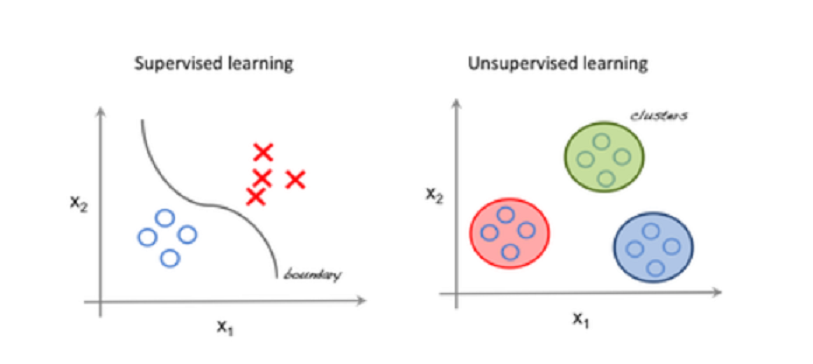

### Clustering

> Clusteren is **een taak** waarbij de data wordt opgedeeld (gepartitioneerd) in verschillende groepen die men **clusters** noemt.

> In **harde clustering** kunnen clusters niet overlappen, in **soft clustering** kan dat wel.

> Datapunten die door het algoritme in dezelfde groep belanden moeten over voldoende overeenkomsten / gelijkaardige eigenschappen en features beschikken.

> Omgekeerd: datapunten die niet in dezelfde cluster terecht zijn gekomen moeten andere en uiteenlopende eigenschappen bevatten.

> Gelijkaardig zijn of net heel verschillend zijn zal gemeten worden aan de hand van een **afstandsmaat** die vooraf gekozen wordt en gebruik maakt van de domeinafhankelijke features.



### Voorbeelden van clustering

#### Market Research / Segmentation  :

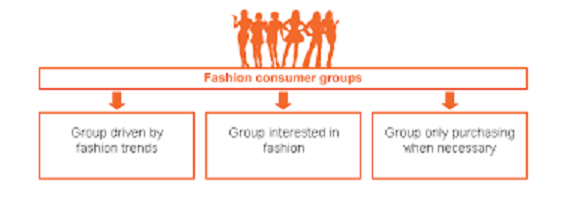

### Voorbeelden van clustering

#### Recommandations : :

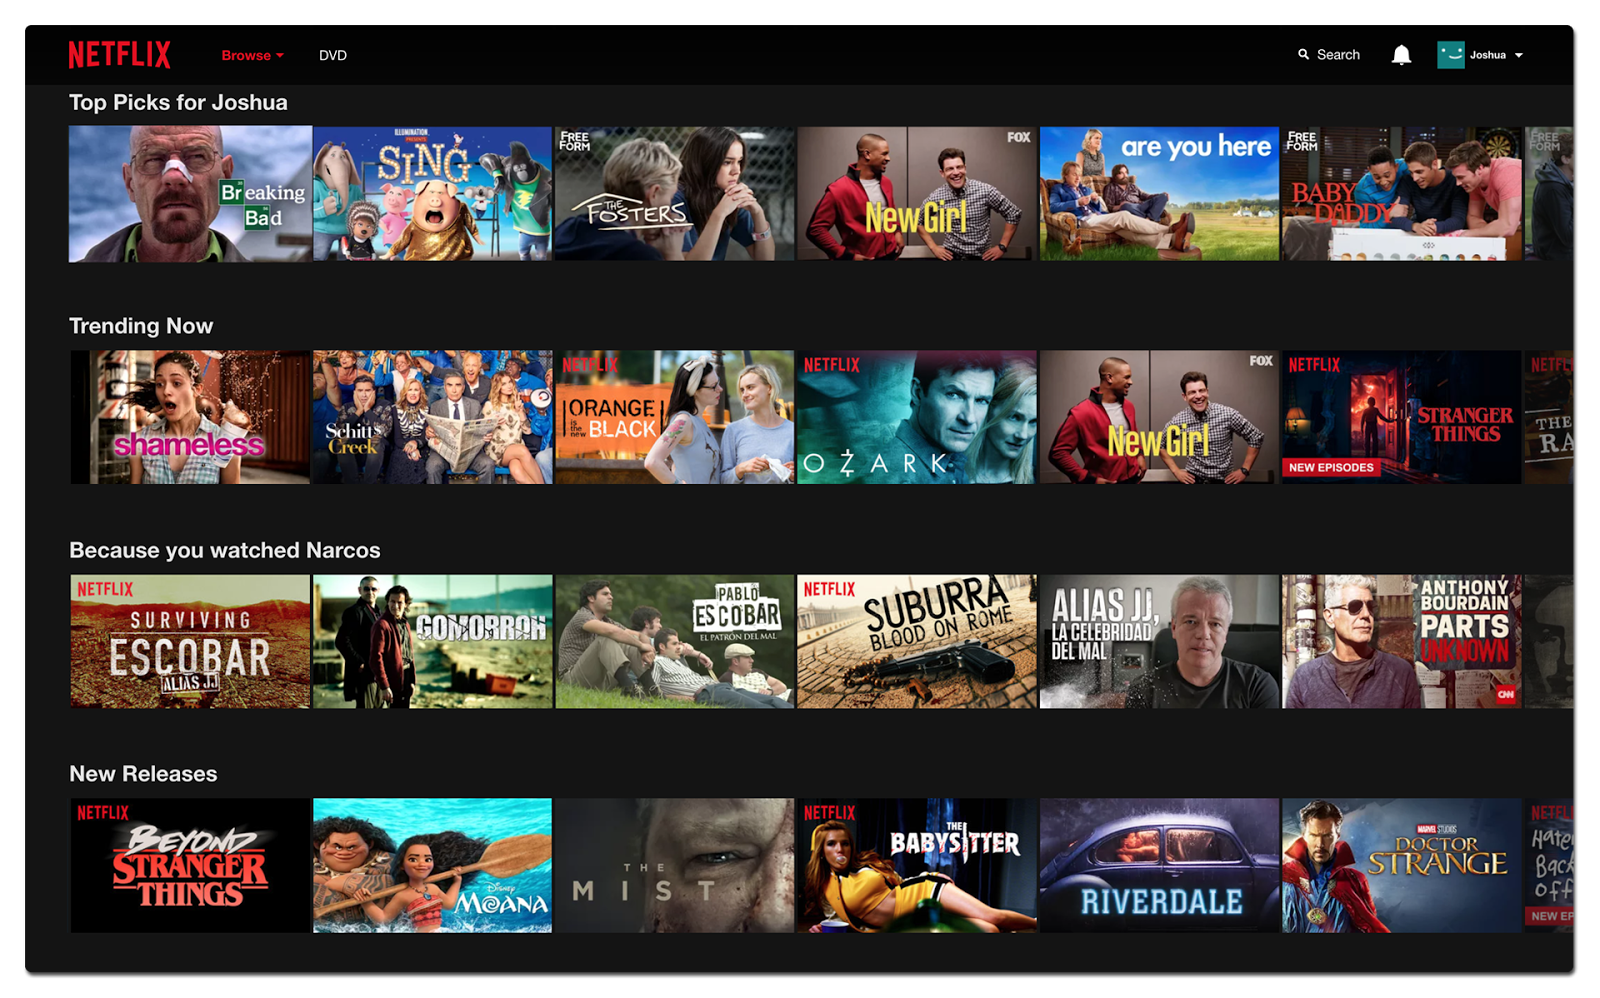


### Voorbeelden van clustering

#### Social network analysis :

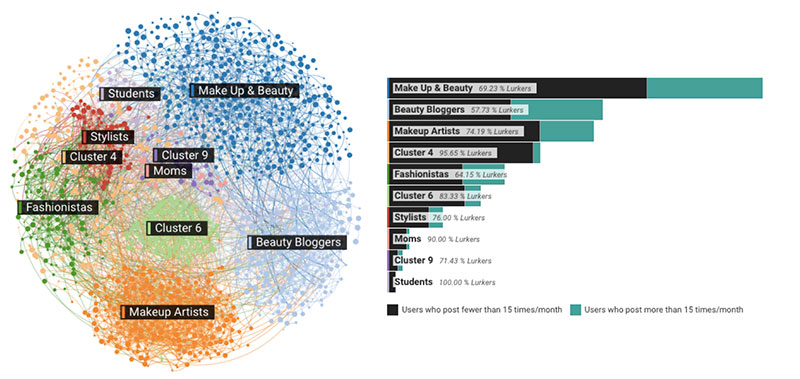


### K-means clustering

> K-means is het gekendste clusteralgoritme, waarbij je op zoek gaat naar cluster centroïds. Je bepaalt vooraf naar hoeveel clusters je op zoek gaat (parameter **k**), je kiest $k$ willekeurige centroïds dan wissel je volgende stappen :

1. ken elk datapunt toe aan die cluster wiens centroïd het dichtst bij dat datapunt ligt
2. wanneer alle datapunten aan een cluster zijn toegekend, bereken per cluster het gemiddelde datapunt binnen die cluster, maak hiervan de nieuwe centroïd.
3. herhaal stap 1 en 2 tot de centroïds niet meer wijzigen.


#### Stappen van k-means clustering (k = 3)

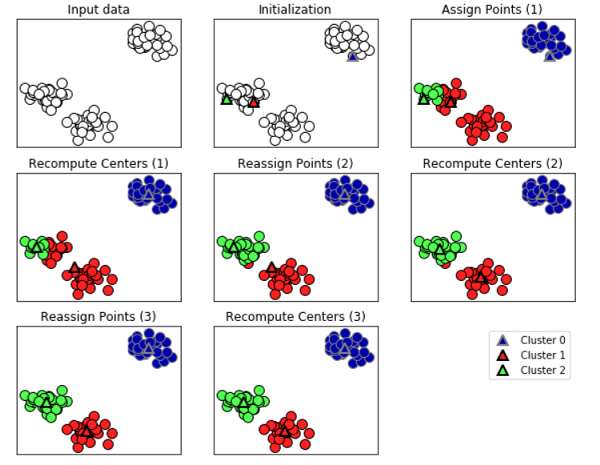


In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X,y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) ## merk op y wordt niet gebruikt hier

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [2]:
print("Cluster memberships:\n{}".format(kmeans.labels_))


Cluster memberships:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [3]:
print(kmeans.predict(X))
kmeans.cluster_centers_

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


array([[ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095],
       [ -6.58196786,  -8.17239339]])

##### Wat als $k$ anders gekozen wordt?

links : $k = 2$ 

rechts : $k = 5$

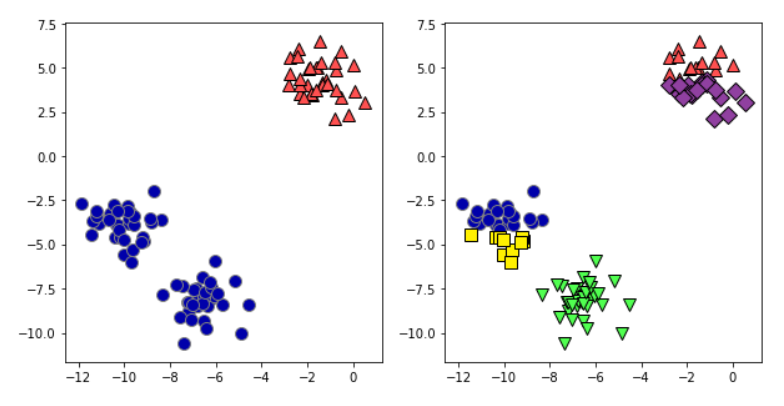

#### Varieren met de initiële centroïds is een goed idee !

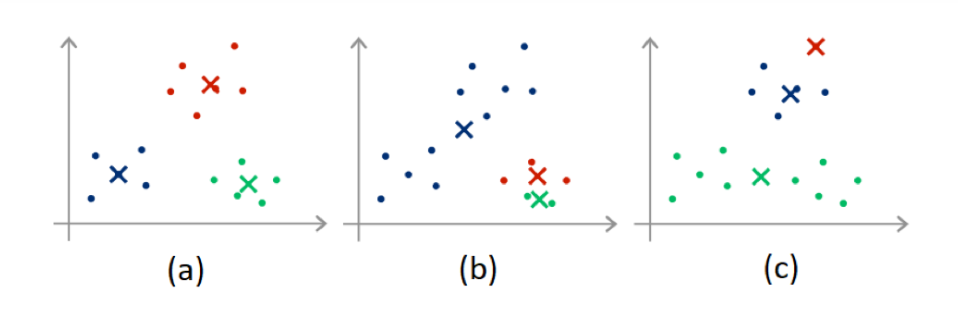

uit: [bron](https://medium.com/sfu-big-data/free-diving-into-k-means-ede29e1ca24d)

### k-means ++

In deze versie moeten **de initiële centroïds** zo gekozen worden dat deze maximaal van elkaar verwijderd liggen.

1. Kies de eerste centroïd willekeurig
2. Bereken de afstand tot elk ander datapunt.
3. Kies de volgende centroïd volgens een kansverdeling die gebaseerd is op de berekende afstanden (punten verder weg hebben meer kans om gekozen te worden)
4. Bereken opnieuw de afstand tussen elk datapunt en zijn dichtsbijzijnde centroïd
5. Herhaal stap 3 en 4 tot je alle centroïds gevonden hebt.
6. Voer k-means uit

### k-means ++

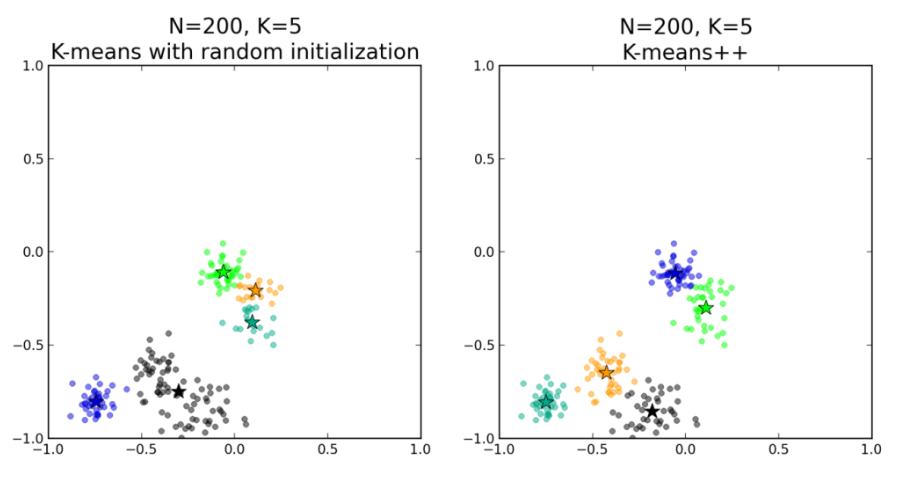

Convergentie gaat ook sneller voor k-means++ [ref](https://datasciencelab.wordpress.com/2014/01/15/improved-seeding-for-clustering-with-k-means/)

De $init$ parameter van $sklearn.cluster.KMeans$ gebruikt als default waarde $k-means++$ voor de initializatie van de centroïds!

#### Beperkingen van k-means

> Elke cluster wordt opgebouwd met min of meer dezelfde diameter. Bovendien is elke cluster telkens een simpele convexe structuur en is elke richting (feature dus) even belangrijk. Niet elk type clustering zal dus gevonden worden door $k-means$ 

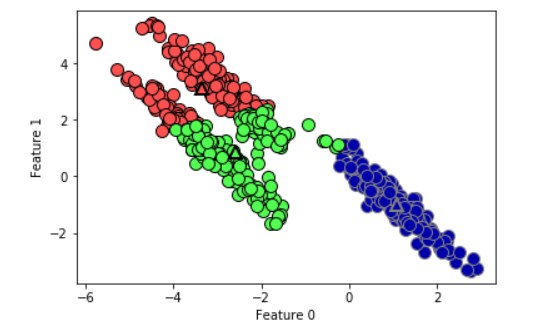



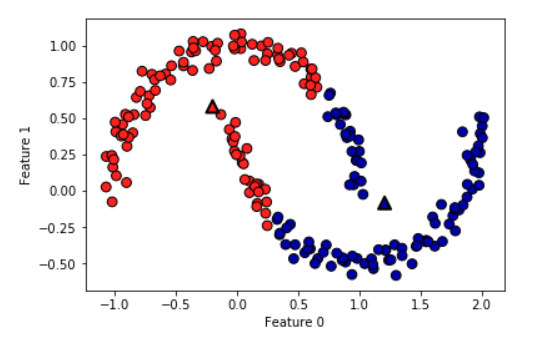

Je kan echter altijd wel $k$ verhogen om de complexiteit te breken :

$k = 10$

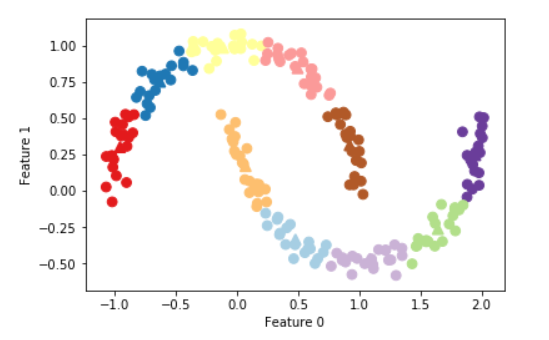

#### Hoe k kiezen?

We kunnen opnieuw de **Elbow methode** toepassen. Als kostfunctie kan je gebruik maken van de som of squared distance (SSE) tussen elk data punt en zijn centroïd. M.a.w. hoe compacter de clusters worden, hoe kleiner de kost wordt. Kies nu deze k die in de punt van de elleboog ligt (dus niet minimaliseren hier we werken immers niet met accuracy !)


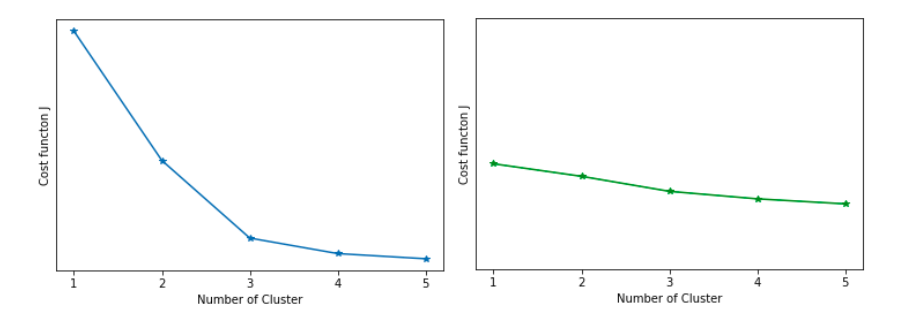


#### Hoe k kiezen?
Je kan ook de **Silhouette methode** toepassen. Deze berekent de mate waarin clusters van elkaar gescheiden zijn door na te gaan hoe goed elk datapunt in zijn cluster past.
Gegeven een datapunt $i$ : 
1. Bereken eerst de gemiddelde afstand van alle punten in dezelfde cluster tot punt  $i$ : $= a_i$
2. Bereken de gemiddelde afstand van alle punten in de cluster die dichtsbij ligt tot punt $i$ : $ = b_i$
3. Bereken de coëfficient :
\begin{equation}
\frac{b_i - a_i}{max(a_i,b_i)}
\end{equation}
 Dit is een waarde tussen $-1$ en $1$. 
 - Waneer deze $1$ is dan ligt datapunt $i$ ver weg van de buurclusters.   
 - Is deze coefficient $0$ dan ligt datapunt $i$ dicht bij buurclusters
 - Is deze coefficient $-1$ dan is het datapunt $i$ in de verkeerde cluster terecht gekomen.

4. Bereken het gemiddelde van al deze coëfficienten. Hoe hoger dit gemiddelde hoe beter / compacter de clusters zijn.

Beschikbaar in :  ```
from sklearn.metrics.cluster import silhouetter_score
```

#### Samengevat k-means :

- populair want eenvoudig te begrijpen / implementeren
- k-means is snel en schaalt goed voor grote datasets
- is wel afhaneklijk van een vooraf goed gekozen $k$
- maar is ook afhankelijk van goede initiële centroïds (en dus de random seed)
- de vormen van de clusters zijn beperkt

### Agglomerative Clustering

> Hierbij wordt van elk datapunt een cluster gemaakt en worden naburige 
clusters versmolten tot 1 cluster tot een vooraf bepaald aantal clusters gevonden is.

> er zijn verschillende linkage keuzes in scikit learn : 

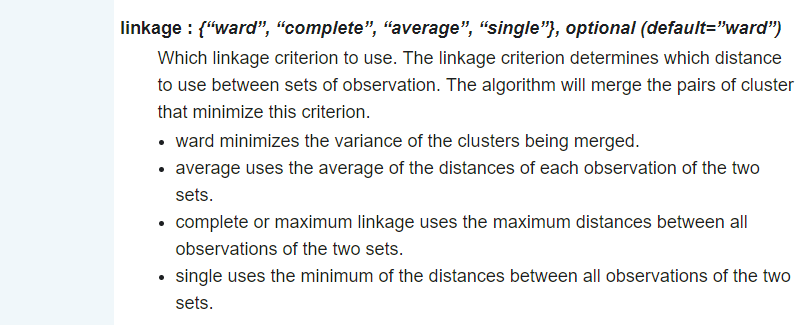

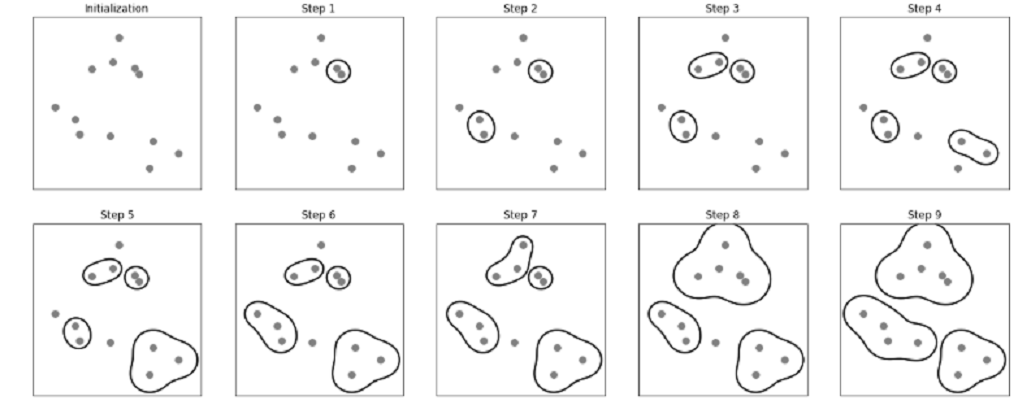

### Hiërarchisch clustering en dendograms

> De manier van clusteren in geval van agglomerative clustering is bottom-up. Dit wil zeggen dat we stap per stap van heel veel clusters naar minder clusters gaan. Een dendogram kan al deze tussenstappen visualiseren en toont dus alle tussenliggende clusters met verschillende k-waarden. Dit kan visueel helpen om de juiste k te kiezen.

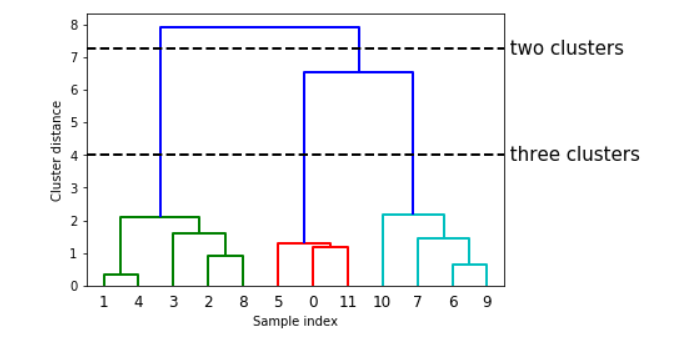



#### Verschil tussen k-means en hiërarchisch clusteren

- Hierarchisch clusteren schaalt niet zo goed als K-means. De tijdscomplexiteit van k-means is lineair, terwijl dat van hiërarchisch clusteren kwadratisch is.

- De resultaten van hierarchisch clusteren zijn reproduceerbaar, deze van k-means niet vermits er een afhankelijkheid is van de random seed.

- K-means verwacht dat er voorkennis is omtrent de keuze van een goede $k$, bij hiërarchisch clusteren is dat ook zo maar je kan het dendogram visueel gebruiken om te stoppen bij eender welke $k$
 


### DBSCAN

**Density based spatial clustering for applications with noise** : gaat op zoek naar _crowded regions in feature space_  waar veel data punten samen zijn. 

Het algoritme werkt als volgt : 
 1. Neem een willekeurig punt. 
 2. Zoek alle punten op een afstand van $\bf{eps}$ (een zelf gekozen waarde, stelt de maximale afstand voor waarin 2 datapunten nog in dezelfde cluster kunnen zijn). 
 3. Wanneer er minder dan $\bf{min\_samples}$ (het minimaal aantal punten nodig om van een cluster te spreken) op deze afstand van het gekozen punt liggen, wordt het punt aangeduid als _noise_ . 
 4. In het andere geval wordt het punt aangeduid als een _core sample_ en wordt een nieuwe cluster gemaakt, het punt krijgt een nieuwe label en alle punten op afstand eps krijgen eveneens dat label. Van alle buren wordt ook nagegaan of ze zelf een core_sample zijn of slechts een _border point_. Van alle core_points worden ook de buren bezocht. 
 5. Herhaal met een ander willekeurig nog niet bezocht punt.

2 parameters moeten ingesteld worden: $eps$ en $min\_samples$, maar 
de $k$ waarde hoeft vooraf niet gekozen te worden.

er kunnen **complexere clusters** gevonden worden en er kunnen **outliers** geïdentificeerd worden



### DBSCAN
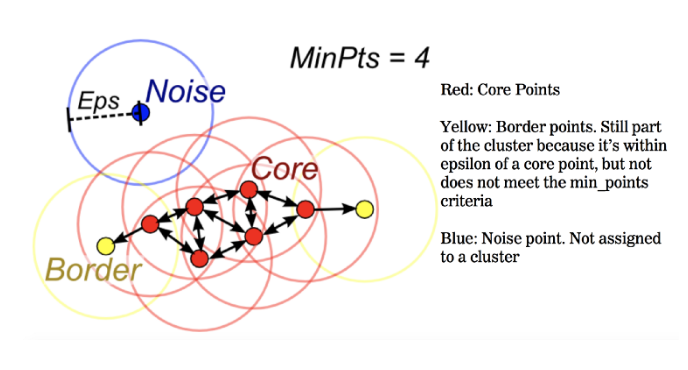

uit: [ref](https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818)

### DBSCAN
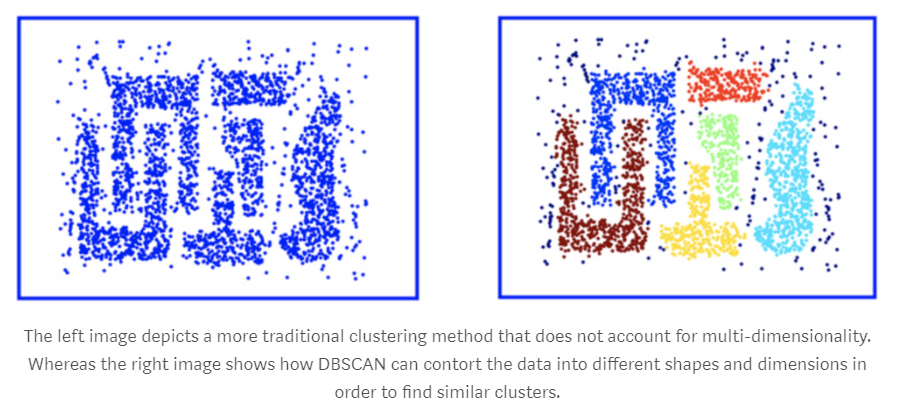

uit: [ref](https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818)

#### Samenvatting DBSCAN

- komt tegemoet aan de nadelen van k-means en hierarchisch clusteren : complexe clusters kunnen gevonden worden en de waarde van $k$ kan onrechtstreeks bepaald worden via de andere parameters $eps$ en $min\_samples$

- kan clusters met hoge densiteit onderscheiden van clusters met lage densiteit

- is in staat om om te gaan met outliers

- minder geschikt wanneer de clusters allen een gemiddelde densiteit hebben
- minder geschikt in heel hoge dimensionele feature ruimtes

### Evaluatie van verschillende clustermethoden via Silhouette




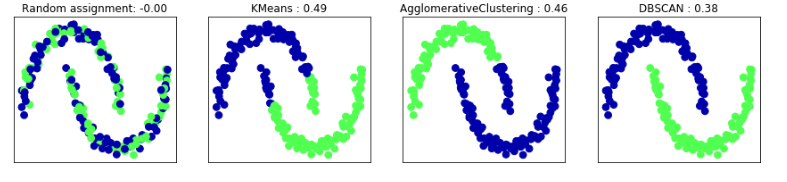


Volgens de silhouette score scoort K-means hier best (hogere score) maar deze meet enkel de compactheid van de clusters en is dus afgestemd op convexe clusters en niet op complexere structuren die hier wel door DBSCAN gevonden worden.

### Preprocessing

Een belangrijke preprocessing techniek van de data is schaling. Vele machine learning algoritmen presteren beter op geschaalde / gestandardizeerde data, omdat je features en afstanden tussen features zou beter kan vergelijken. Vermits deze bewerkingen op ongelabelde data gebeuren zijn ze unsupervised.

In sklearn vind je volgende herschalingstechnieken :

1. **StandardScaler**: Voor elke feature wordt het gemiddelde op 0 gebracht en de variantie op 1.

2. **RobustScaler**: deze gebruikt de mediaan en de quartielen ipv gemiddelde en variantie. De mediaan is het datapunt waarvan de helft van de datapunten kleiner is en de andere helft groter is. Het kleinste kwartiel is dat datapunt waarvan 1/4de van de data kleiner is, het grootste kwartiel is dat punt waarvan 1/4de van de data groter is.

3. **MinmaxScaler**: de data van alle features wordt tussen 0 en 1 geschaald.

4. **Normalizer**: elke feature vector wordt zo geschaald dat zijn Eulidische lengte 1 wordt. (projectie op de eenheidscirkel/sfeer)


#### Schaling van de data

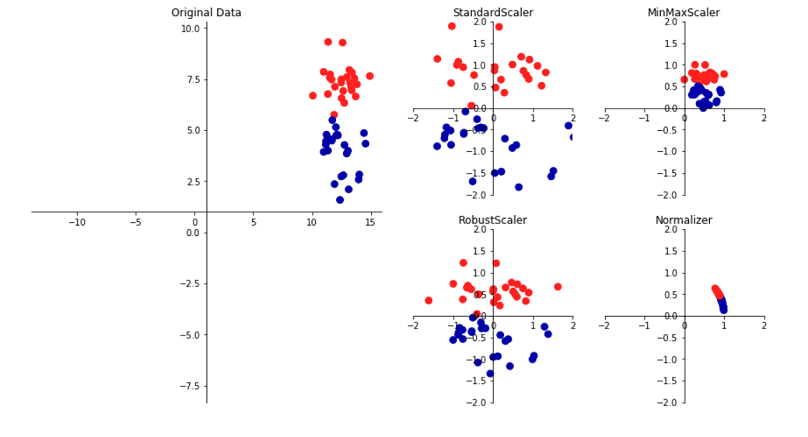

### Effect van schaling op prestaties van supervised learning

In [48]:
from sklearn.datasets import load_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Tree test set accuracy: {:.2f}".format(tree.score(X_test, y_test)))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Knn test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))



Tree test set accuracy: 0.93
Knn test set accuracy: 0.92


In [50]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning on the scaled training data
tree.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Tree test accuracy: {:.2f}".format(tree.score(X_test_scaled, y_test)))
print("Knn test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Tree test accuracy: 0.94
Knn test accuracy: 0.98


### Principal Component Analysis

PCA : zie ook les linaire algebra. **Deze methode zoekt lineaire combinaties van de features zodat deze de meeste variantie en informatie van de data bevatten.** Deze nieuwe componenten worden gevonden via transformaties (rotaties) van de oorspronkelijke data in de feature ruimte.

Het is belangrijk de features eerst te schalen. Het is immers zo dat wanneer je dat niet doet de ene feature minder lijkt te variëren dan de andere feature puur omdat ze in een andere eenheid weergegeven zijn. Voorbeeld : de lengte van een persoon wordt opgegeven in meter, terwijl het gewicht gegeven is in kilo. De richting van de meeste variatie in de data zal zeker het gewicht aanduiden, maar een verschil in hoogte van 1 meter is duidelijk van groter belang dan een verandering in gewicht van 1 kilo ... Na herschaling zijn features eerlijker te vergelijken!


PCA verwacht ook geschaalde data :
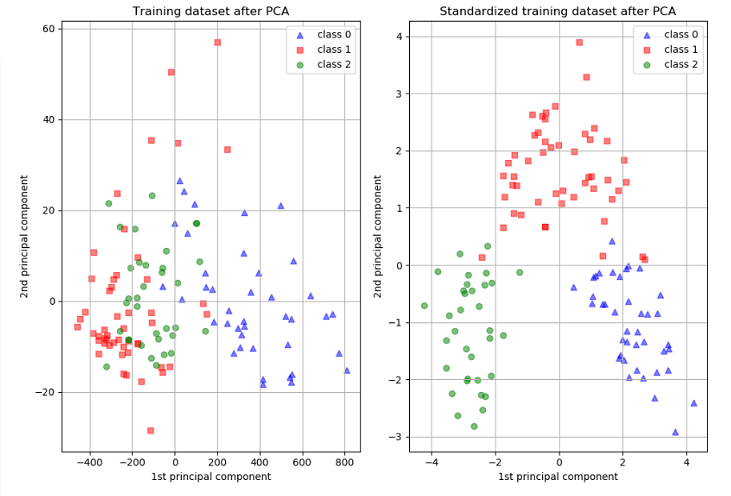

### Visualisatie van hogere feature ruimten via PCA


De iris dataset bevat 4 features - hoe deze visualiseren?

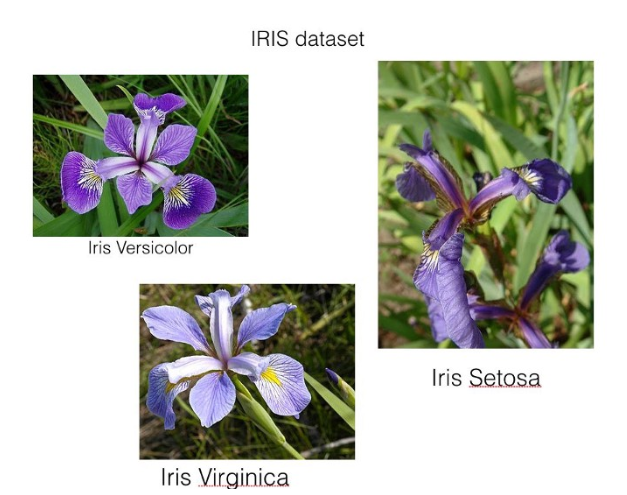




In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()


# Standardizing the features
irisScaled =  StandardScaler().fit_transform(iris.data)

#PCA projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(irisScaled)


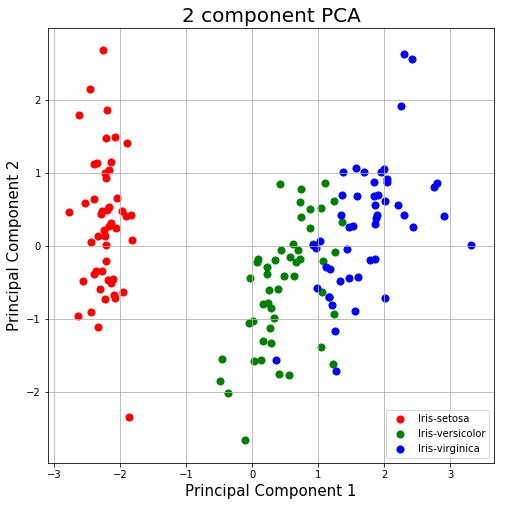

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
scatters = [ax.scatter(principalComponents[i,0], principalComponents[i,1], c = colors[iris.target[i]], s = 50)
            for i in range(len(iris.data))]
    
ax.legend([scatters[0], scatters[50], scatters[149]], targets)
ax.grid()
plt.show()

### PCA projectie naar 2D

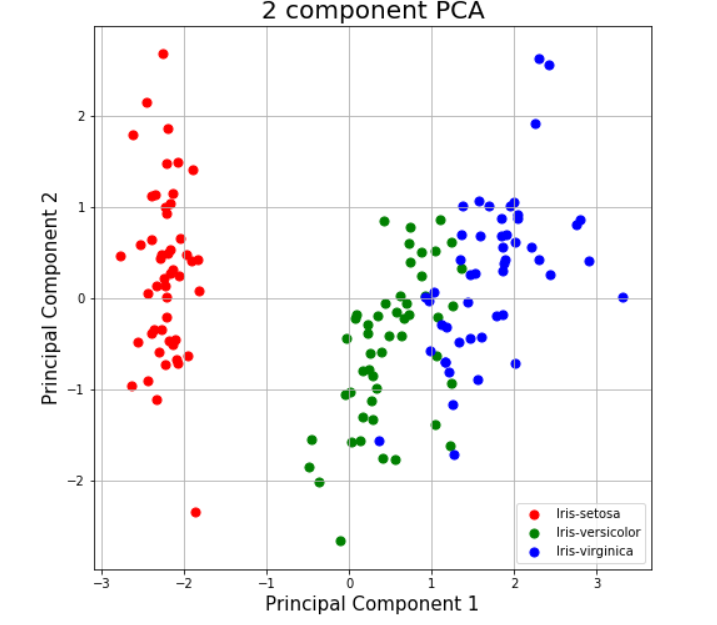

### Dimensionality Reductie via PCA

Voorbeeld : de digits dataset bevat 64 features

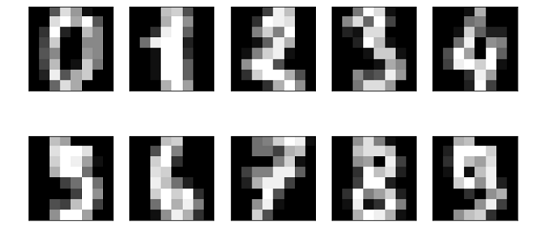

In [98]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

train_img, test_img, train_lbl, test_lbl = train_test_split(digits.data, digits.target)
print(train_img.shape)
print(test_img.shape)

(1347, 64)
(450, 64)


In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [100]:
from sklearn.decomposition import PCA
pca = PCA(.90) ## the number of components such that the amount of variance that needs to be 
## explained is greater than the percentage specified by n_components.
pca.fit(train_img)
print(pca.n_components_)
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

31


In [101]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver = 'lbfgs', multi_class='auto', max_iter = 500 )
logisticRegr.fit(train_img, train_lbl)
score = logisticRegr.score(test_img, test_lbl)
print("test accuracy: {:.2f}".format(score))

test accuracy: 0.97


### PCA Samengevat

 - Als je leeralgoritme traag wordt omdat je input/feature-ruimte te groot is, dan kan je PCA toepassen om het leren te versnellen.
 
 - Ook wanneer memory een issue is, kan PCA helpen in ruil voor het opgeven van een minimale hoeveelheid informatie in de data.
 - PCA is niet scale-invariant (eerst schalen dus).
 - De techniek gaat er vanuit dat de richtingen met de meeste variantie in de data de meest interessante is.
 - De transformaties die gebruikt worden zijn enkel rotaties.
 - PCA steunt op statische gegevens zoals gemiddelde en co-variantie. Niet elke dataverdeling is hierdoor gekarakterizeerd.
 - Alleen wanneer de features gecorreleerd blijken te zijn kan er reductie van dimensie verkregen worden, in het andere geval zal PCA de features gewoon anders voorstellen via de varianties.


### References



[K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644)

[DBSCAN: What is it? When to Use it? How to use it.](https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818)

[An Introduction to Clustering and different methods of clustering](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/)

[PCA using Python (scikit-learn)
](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)